In [5]:
import pandas as pd

In [23]:
df = pd.read_csv('dataset_results.csv')


In [24]:
df = df[df.results.notna()]

In [25]:
df = df.drop(df[df.results == 'Time limit reached.\r\n'].index)
df = df.drop(df[df.results == 'No solution exists.\r\n'].index)
#df = df.drop(df[df.results == 'key_action1(char_acting)\r\n'].index)
#df = df.drop(df[df.results == 'key_action2(char_acting)\r\n'].index)
#df = df.drop(df[df.results == 'key_action3(char_acting)\r\n'].index)
#df = df.drop(df[df.results == 'unblock_yourself(char_acting)'].index)
df.reset_index(inplace=True,drop=True)


In [81]:
df.columns

Index(['scenario', 'acting_char', 'Alice_alive', 'Alice_underArrest',
       'Alice_angry', 'Alice_suspect', 'Alice_at', 'Bob_alive',
       'Bob_underArrest', 'Bob_angry', 'Bob_suspect', 'Bob_at',
       'Charlie_alive', 'Charlie_underArrest', 'Charlie_angry',
       'Charlie_suspect', 'Charlie_at', 'Sherlock_alive',
       'Sherlock_underArrest', 'Sherlock_angry', 'Sherlock_suspect',
       'Sherlock_at', 'HomeB_searched', 'BasketballCourt_searched',
       'Downtown_searched', 'Basketball_has', 'Bat_has',
       'Theft_Basketball_HomeB_clues',
       'Theft_Basketball_BasketballCourt_clues',
       'Theft_Basketball_Downtown_clues', 'Theft_Bat_HomeB_clues',
       'Theft_Bat_BasketballCourt_clues', 'Theft_Bat_Downtown_clues',
       'Murder_Basketball_HomeB_clues',
       'Murder_Basketball_BasketballCourt_clues',
       'Murder_Basketball_Downtown_clues', 'Murder_Bat_HomeB_clues',
       'Murder_Bat_BasketballCourt_clues', 'Murder_Bat_Downtown_clues',
       'result', 'time'],
    

In [26]:
df.head(5)

,scenario,acting_char,Alice_alive,Alice_underArrest,Alice_angry,Alice_suspect,Alice_at,Bob_alive,Bob_underArrest,Bob_angry,...,Theft_Bat_BasketballCourt_clues,Theft_Bat_Downtown_clues,Murder_Basketball_HomeB_clues,Murder_Basketball_BasketballCourt_clues,Murder_Basketball_Downtown_clues,Murder_Bat_HomeB_clues,Murder_Bat_BasketballCourt_clues,Murder_Bat_Downtown_clues,results,time
0,1,Alice,1,0,1,2,HomeB,1,0,1,...,0,0,0,0,0,0,0,0,"travel(Alice, HomeB, Downtown) steal(Alice, Bo...",0.708981
1,1,Charlie,1,0,1,2,BasketballCourt,1,0,0,...,0,0,0,0,0,0,0,0,"travel(Charlie, Downtown, BasketballCourt) kil...",0.701070
2,1,Bob,1,0,1,2,BasketballCourt,1,0,0,...,0,0,0,0,0,0,0,0,"travel(Bob, HomeB, BasketballCourt) steal(Bob,...",0.784737
3,1,Alice,1,0,1,2,BasketballCourt,1,0,1,...,0,0,0,0,0,0,0,0,"play_basketball(Alice, Bob, BasketballCourt)\r\n",0.686699
4,1,Alice,1,0,1,2,Downtown,1,0,1,...,0,0,0,0,0,0,0,0,"travel(Alice, Downtown, BasketballCourt) steal...",0.698028


In [27]:
df.results.value_counts()

travel(Bob, HomeB, BasketballCourt) steal(Bob, Alice, Basketball, BasketballCourt) play_basketball(Bob, Alice, BasketballCourt)\r\n                                                        206
travel(Charlie, Downtown, BasketballCourt) kill(Charlie, Alice, Basketball, BasketballCourt)\r\n                                                                                           202
kill(Charlie, Alice, Basketball, HomeB)\r\n                                                                                                                                                199
travel(Alice, HomeB, BasketballCourt) play_basketball(Alice, Bob, BasketballCourt)\r\n                                                                                                     197
travel(Bob, Downtown, BasketballCourt) steal(Bob, Alice, Basketball, BasketballCourt) play_basketball(Bob, Alice, BasketballCourt)\r\n                                                     195
                                             

In [28]:

action = df.at[0,'results'].split(' ')[0]
action = action.replace('(',' ')
action = action.split(' ')
print(action)
only_action = action[0]
variables = action[1][:-1].split(', ')

print(only_action)
print(variables)

['travel', 'Alice,']
travel
['Alice']


In [10]:
df_effects = pd.read_csv('basketball_effects_nn.csv')

In [29]:
def removern(row):
    if 'results' in row.index:
        row.results = row.results.replace('\r','')
        row.results = row.results.replace('\n','')
        row.results = row.results.replace('\t','')
    if 'effect' in row.index:
        row.effect = row.effect.replace('\r','')
        row.effect = row.effect.replace('\n','')
        row.effect = row.effect.replace('\t','')
    return row

In [30]:
df = df.apply(removern,axis=1)

In [31]:
df_effects = df_effects.apply(removern,axis=1)

In [303]:
df_effects

,action,effect,effect_function
0,lose_support_authority,"!supports(char2,char3);support(char3) - 1",arg2_supports_arg3:=_0;arg3_support:-_1\n
1,travel,at(character) = to;,arg1_at:=_arg3
2,arrest,underArrest(character) = 1;,arg2_underArrest:=_1
3,steal,has(item) = thief ;angry(victim) = 1 ;clue(The...,arg3_has:=_arg1;arg2_angry:=_1;Theft_arg3_arg4...
4,play_basketball,angry(player1) = 0 ;angry(player2) = 0;,arg1_angry:=_0;arg2_angry:=_0
5,kill,"!alive(victim);clue(Murder, item, place);",arg2_alive:=_0;Murder_arg3_arg4_clues:=_1
6,find_clues,searched(place) = 1 ;,arg4_searched:=_1
7,share_clues,"believes(police2, clue(crime, item, place));",arg3_arg4_arg5_clues:=_1
8,suspect_of_crime,"suspect(citizen, crime);",arg2_suspect:=_arg3


In [14]:
def replace_effect(effect,args):
	for count,arg in enumerate(args,0):			
		effect = effect.replace('arg'+str(count+1),arg)
	
	return effect
					
						


In [15]:
def create_result(df ,row):
    
    
    actions = row.results.split(') ')

    action = actions[0]
    
    action = action.split('(')
    only_action = action[0]
    
    variables = action[1].replace(')','').split(', ')
    
    new_row = row
    effects= df_effects[df_effects.action == action[0]].effect_function
        
    if len(effects) > 0:
        for effect in str(effects.values[0]).split(';'):
            new_row.results = replace_effect(effect,variables) 
            df.loc[len(df)] = new_row
            

        #df.drop(index)
    return only_action
        #musi być action_variables albo najlepiej co się zmienia
    

In [32]:
df2 = pd.DataFrame(columns = df.columns)
for index, row in df.iterrows():
    create_result(df2,row)
    
    
#df['result'] = df.apply(create_result,axis=1)
#df2 = df2.drop(['time','scenario'],axis=1)




In [298]:
df = df2
df.rename({'results':'result'},axis=1,inplace=True)

In [287]:
df.columns

Index(['scenario', 'acting_char', 'Alice_alive', 'Alice_underArrest',
       'Alice_angry', 'Alice_suspect', 'Alice_at', 'Bob_alive',
       'Bob_underArrest', 'Bob_angry', 'Bob_suspect', 'Bob_at',
       'Charlie_alive', 'Charlie_underArrest', 'Charlie_angry',
       'Charlie_suspect', 'Charlie_at', 'Sherlock_alive',
       'Sherlock_underArrest', 'Sherlock_angry', 'Sherlock_suspect',
       'Sherlock_at', 'HomeB_searched', 'BasketballCourt_searched',
       'Downtown_searched', 'Basketball_has', 'Bat_has',
       'Theft_Basketball_HomeB_clues',
       'Theft_Basketball_BasketballCourt_clues',
       'Theft_Basketball_Downtown_clues', 'Theft_Bat_HomeB_clues',
       'Theft_Bat_BasketballCourt_clues', 'Theft_Bat_Downtown_clues',
       'Murder_Basketball_HomeB_clues',
       'Murder_Basketball_BasketballCourt_clues',
       'Murder_Basketball_Downtown_clues', 'Murder_Bat_HomeB_clues',
       'Murder_Bat_BasketballCourt_clues', 'Murder_Bat_Downtown_clues',
       'result', 'time', 'Alic

In [299]:
data={}
data_list = []
for index, row in df.iterrows():
    data={}
    data['Alice_at_Bob'] = 1 if row['Alice_at'] == row['Bob_at'] else 0
    data['Alice_at_Charlie'] = 1 if row['Alice_at'] == row['Charlie_at'] else 0
    data['Alice_at_Sherlock'] = 1 if row['Alice_at'] == row['Sherlock_at'] else 0
    data['Bob_at_Charlie'] = 1 if row['Charlie_at'] == row['Bob_at'] else 0
    data['Bob_at_Sherlock'] = 1 if row['Sherlock_at'] == row['Bob_at'] else 0
    data['Charlie_at_Sherlock'] = 1 if row['Charlie_at'] == row['Charlie_at'] else 0

    data['Bat_at'] = row[str(row['Bat_has'])+'_at'] 
    data['Basketball_at'] = row[str(row['Basketball_has'])+'_at'] 

    data['Alice_at_Bat'] = 1 if row['Alice_at'] == data['Bat_at'] else 0
    data['Bob_at_Bat'] = 1 if row['Bob_at'] == data['Bat_at'] else 0
    data['Charlie_at_Bat'] = 1 if row['Charlie_at'] == data['Bat_at'] else 0
    data['Sherlock_at_Bat'] = 1 if row['Sherlock_at'] == data['Bat_at'] else 0
    data['Alice_at_Basketball'] = 1 if row['Alice_at'] == data['Basketball_at'] else 0
    data['Bob_at_Basketball'] = 1 if row['Bob_at'] == data['Basketball_at'] else 0
    data['Charlie_at_Basketball'] = 1 if row['Charlie_at'] == data['Basketball_at'] else 0
    data['Sherlock_at_Basketball'] = 1 if row['Sherlock_at'] == data['Basketball_at'] else 0
    data_list.append(data)
    


In [300]:
df_equates = pd.DataFrame.from_records(data=data_list)

In [301]:
df_equates

,Alice_at_Bob,Alice_at_Charlie,Alice_at_Sherlock,Bob_at_Charlie,Bob_at_Sherlock,Charlie_at_Sherlock,Bat_at,Basketball_at,Alice_at_Bat,Bob_at_Bat,Charlie_at_Bat,Sherlock_at_Bat,Alice_at_Basketball,Bob_at_Basketball,Charlie_at_Basketball,Sherlock_at_Basketball
0,0,0,0,0,0,1,Downtown,Downtown,0,1,0,0,0,1,0,0
1,0,0,0,0,1,1,HomeB,Downtown,0,1,0,1,0,0,1,0
2,0,0,0,1,0,1,HomeB,BasketballCourt,0,1,1,0,1,0,0,0
3,1,0,1,0,1,1,BasketballCourt,BasketballCourt,1,1,0,1,1,1,0,1
4,1,0,1,0,1,1,BasketballCourt,BasketballCourt,1,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15378,1,0,0,0,0,1,BasketballCourt,Downtown,1,1,0,0,0,0,1,0
15379,0,0,0,0,0,1,HomeB,HomeB,1,0,0,0,1,0,0,0
15380,0,0,0,1,0,1,BasketballCourt,Downtown,0,1,1,0,1,0,0,0
15381,1,1,0,1,0,1,HomeB,HomeB,1,1,1,0,1,1,1,0


In [302]:

df_extra =  pd.concat([df, df_equates], axis=1)

In [325]:
df=df_extra

In [326]:
df = df[ df['result'].str.contains('_at:=')]
df = df[ df['acting_char']=='Alice' ]  
#df = df[ df['Basketball_has']=='Alice' ]  
#df = df[ df['Alice_angry']==1 ]  
#df = df[ df['Alice_at']=='Downtown' ]  
#df= df.head(2)

In [327]:
df.result.value_counts()

Alice_at:=_BasketballCourt    1319
Alice_at:=_Downtown            254
Alice_at:=_HomeB               215
Name: result, dtype: int64

In [72]:
print(df[df.result=='Alice_at:=_HomeB'].to_string())

      scenario acting_char Alice_alive Alice_underArrest Alice_angry Alice_suspect  Alice_at Bob_alive Bob_underArrest Bob_angry Bob_suspect           Bob_at Charlie_alive Charlie_underArrest Charlie_angry Charlie_suspect       Charlie_at Sherlock_alive Sherlock_underArrest Sherlock_angry Sherlock_suspect      Sherlock_at HomeB_searched BasketballCourt_searched Downtown_searched Basketball_has  Bat_has Theft_Basketball_HomeB_clues Theft_Basketball_BasketballCourt_clues Theft_Basketball_Downtown_clues Theft_Bat_HomeB_clues Theft_Bat_BasketballCourt_clues Theft_Bat_Downtown_clues Murder_Basketball_HomeB_clues Murder_Basketball_BasketballCourt_clues Murder_Basketball_Downtown_clues Murder_Bat_HomeB_clues Murder_Bat_BasketballCourt_clues Murder_Bat_Downtown_clues            result      time
11           1       Alice           1                 0           1             2  Downtown         1               0         1           2  BasketballCourt             1                   0           

In [443]:
print(df.to_string())


   scenario Alice_alive Alice_underArrest Alice_angry Alice_suspect Bob_alive Bob_underArrest Bob_angry Bob_suspect Charlie_alive Charlie_underArrest Charlie_angry Charlie_suspect Sherlock_alive Sherlock_underArrest Sherlock_angry Sherlock_suspect HomeB_searched BasketballCourt_searched Downtown_searched Theft_Basketball_HomeB_clues Theft_Basketball_BasketballCourt_clues Theft_Basketball_Downtown_clues Theft_Bat_HomeB_clues Theft_Bat_BasketballCourt_clues Theft_Bat_Downtown_clues Murder_Basketball_HomeB_clues Murder_Basketball_BasketballCourt_clues Murder_Basketball_Downtown_clues Murder_Bat_HomeB_clues Murder_Bat_BasketballCourt_clues Murder_Bat_Downtown_clues                      result      time  acting_char_Alice  Alice_at_Downtown  Alice_at_HomeB  Bob_at_BasketballCourt  Charlie_at_BasketballCourt  Charlie_at_HomeB  Sherlock_at_BasketballCourt  Sherlock_at_Downtown  Basketball_has_Alice  Bat_has_Alice
40        1           1                 0           1             2         1   

In [ ]:
df.dtypes

In [328]:
df = df.convert_dtypes()

In [329]:
categorical = [x for x in df.columns if df[x].dtype == 'string'and x != 'result' ] 
#categorical = ['char_acting_state','char1_state','char2_state'] 
print(categorical)

['acting_char', 'Alice_at', 'Bob_at', 'Charlie_at', 'Sherlock_at', 'Basketball_has', 'Bat_has', 'result', 'Bat_at', 'Basketball_at']


In [330]:
from sklearn.preprocessing import OneHotEncoder
from collections import defaultdict

#d = defaultdict(OneHotEncoder)


# Encoding the variable
#df = df.apply(lambda x: d[x.name].fit_transform(x))
# Inverse the encoded
#df.apply(lambda x: d[x.name].inverse_transform(x))

# Using the dictionary to label future data
#df.apply(lambda x: d[x.name].transform(x))

df = pd.get_dummies(df, columns = categorical)



In [323]:
df

,scenario,Alice_alive,Alice_underArrest,Alice_angry,Alice_suspect,Bob_alive,Bob_underArrest,Bob_angry,Bob_suspect,Charlie_alive,...,Basketball_has_Alice,Bat_has_Alice,Bat_has_Bob,Bat_has_Charlie,result_Alice_at:=_BasketballCourt,Bat_at_BasketballCourt,Bat_at_Downtown,Bat_at_HomeB,Basketball_at_Downtown,Basketball_at_HomeB
40,1,1,0,1,2,1,0,0,2,1,...,1,1,0,0,1,0,1,0,1,0
65,1,1,0,1,2,1,0,0,2,1,...,1,1,0,0,1,0,0,1,0,1
116,1,1,0,1,2,1,0,0,2,1,...,1,0,0,1,1,1,0,0,1,0
130,1,1,0,1,2,1,0,0,2,1,...,1,0,1,0,1,0,0,1,1,0
144,1,1,0,1,2,1,0,1,2,1,...,1,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15283,4,1,0,1,2,1,0,0,2,1,...,1,0,0,1,1,0,1,0,0,1
15286,4,1,0,1,2,1,0,0,2,1,...,1,0,0,1,1,1,0,0,0,1
15301,4,1,0,1,2,1,0,1,2,1,...,1,0,0,1,1,1,0,0,0,1
15366,4,1,0,1,2,1,0,0,2,1,...,1,0,1,0,1,1,0,0,0,1


In [334]:
corr_matrix = df.corr()['Basketball_at_BasketballCourt'].sort_values()
print(corr_matrix.to_string())

Alice_at_Basketball                       -0.583445
Basketball_has_Alice                      -0.583445
Basketball_at_HomeB                       -0.533463
Basketball_at_Downtown                    -0.530642
result_Alice_at:=_Downtown                -0.328695
Alice_at_BasketballCourt                  -0.319589
result_Alice_at:=_HomeB                   -0.298637
Charlie_at_Downtown                       -0.084990
Alice_at_Bob                              -0.079452
Bob_at_Downtown                           -0.071806
Alice_at_Charlie                          -0.070699
Alice_at_Bat                              -0.058946
Alice_at_Sherlock                         -0.054762
Bob_at_HomeB                              -0.054302
Bat_has_Alice                             -0.031979
Bat_at_BasketballCourt                    -0.029275
Sherlock_angry                            -0.022039
Charlie_at_HomeB                          -0.020110
Sherlock_at_HomeB                         -0.017676
BasketballCo

In [312]:
df.result.value_counts()

AttributeError: 'DataFrame' object has no attribute 'result'

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [369]:
df

,scenario,Alice_alive,Alice_underArrest,Alice_angry,Alice_suspect,Bob_alive,Bob_underArrest,Bob_angry,Bob_suspect,Charlie_alive,...,Charlie_at_HomeB,Sherlock_at_BasketballCourt,Sherlock_at_Downtown,Sherlock_at_HomeB,Basketball_has_Alice,Basketball_has_Bob,Basketball_has_Charlie,Bat_has_Alice,Bat_has_Bob,Bat_has_Charlie
0,1,1,0,1,2,1,0,1,2,1,...,0,1,0,0,0,1,0,0,1,0
5,1,1,0,1,2,1,0,1,2,1,...,0,0,0,1,0,1,0,1,0,0
7,1,1,0,1,2,1,0,1,2,1,...,0,1,0,0,0,1,0,0,0,1
11,1,1,0,1,2,1,0,1,2,1,...,1,1,0,0,0,0,1,0,0,1
36,1,1,0,1,2,1,0,0,2,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15352,4,1,0,1,2,1,0,1,2,1,...,0,0,1,0,0,0,1,0,1,0
15362,4,1,0,1,2,1,0,1,2,1,...,0,0,0,1,0,1,0,0,0,1
15366,4,1,0,1,2,1,0,0,2,1,...,1,0,0,1,1,0,0,0,1,0
15367,4,1,0,1,2,1,0,1,2,1,...,1,0,0,1,1,0,0,0,1,0


In [159]:
y = df.result
X = df.drop(['result','time','scenario'],axis=1)

In [168]:
X

,Alice_alive,Alice_underArrest,Alice_angry,Alice_suspect,Bob_alive,Bob_underArrest,Bob_angry,Bob_suspect,Charlie_alive,Charlie_underArrest,...,Basketball_has_Charlie,Bat_has_Alice,Bat_has_Bob,Bat_has_Charlie,Bat_at_BasketballCourt,Bat_at_Downtown,Bat_at_HomeB,Basketball_at_BasketballCourt,Basketball_at_Downtown,Basketball_at_HomeB
0,1,0,1,2,1,0,1,2,1,0,...,0,0,1,0,0,1,0,0,1,0
5,1,0,1,2,1,0,1,2,1,0,...,0,1,0,0,0,1,0,1,0,0
7,1,0,1,2,1,0,1,2,1,0,...,0,0,0,1,1,0,0,1,0,0
11,1,0,1,2,1,0,1,2,1,0,...,1,0,0,1,0,0,1,0,0,1
36,1,0,1,2,1,0,0,2,1,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15352,1,0,1,2,1,0,1,2,1,0,...,1,0,1,0,1,0,0,0,1,0
15362,1,0,1,2,1,0,1,2,1,0,...,0,0,0,1,1,0,0,1,0,0
15366,1,0,1,2,1,0,0,2,1,0,...,0,0,1,0,1,0,0,0,0,1
15367,1,0,1,2,1,0,1,2,1,0,...,0,0,1,0,1,0,0,0,1,0


In [160]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

In [161]:
clf = DecisionTreeClassifier(random_state=12345,
                             criterion='gini',
                               max_depth=6,
                               
                               min_samples_split=10,
                               min_samples_leaf=10,
                               max_features=10) 
model = clf.fit(X_train,y_train)
y_pred = model.predict(X_test)
# get importance


In [162]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


<AxesSubplot: >

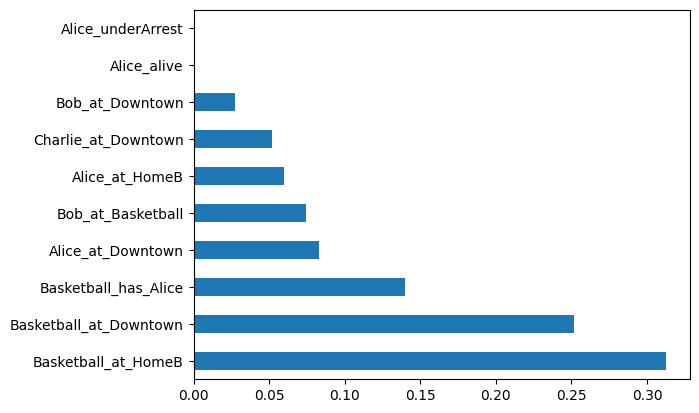

In [236]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [238]:
print(list(feat_importances.nlargest(10).index))

['Basketball_at_HomeB', 'Basketball_at_Downtown', 'Basketball_has_Alice', 'Alice_at_Downtown', 'Bob_at_Basketball', 'Alice_at_HomeB', 'Charlie_at_Downtown', 'Bob_at_Downtown', 'Alice_alive', 'Alice_underArrest']


In [235]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 if v > 0:
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance


Feature: 42, Score: 0.07409
Feature: 47, Score: 0.08282
Feature: 48, Score: 0.05966
Feature: 50, Score: 0.02729
Feature: 53, Score: 0.05173
Feature: 58, Score: 0.14003
Feature: 68, Score: 0.25184
Feature: 69, Score: 0.31253


In [148]:
feature_names=X.columns

In [170]:
[str(x) for x  in list(y.unique())]

['Alice_at:=_Downtown', 'Alice_at:=_BasketballCourt', 'Alice_at:=_HomeB']

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names=[str(x) for x  in list(y.unique())],
                   filled=True)

In [49]:
import numpy as np
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names,pr):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths, pr):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths,pr)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths,pr)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths,pr)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "

        classes = path[-1][0][0]
        l = np.argmax(classes)
        proba = np.round(100.0*classes[l]/np.sum(classes),2)

        

        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            
            rule += f"class: {class_names[l]} (proba: {proba}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        if(proba >= pr):  rules += [rule]
        
    return rules

In [163]:
rules = get_rules(clf, X.columns, [str(x) for x  in list(y)],70)
#spróbuj też z dalszymi efektami?
#coś bardziej ogólnego
#sprawdz czy na pewno sie zgadzaja
for r in rules:
    print(r)

if (Basketball_has_Alice > 0.5) then class: Alice_at:=_Downtown (proba: 100.0%) | based on 383 samples
if (Basketball_has_Alice <= 0.5) and (Alice_at_HomeB > 0.5) and (Basketball_at_Downtown <= 0.5) then class: Alice_at:=_Downtown (proba: 100.0%) | based on 201 samples
if (Basketball_has_Alice <= 0.5) and (Alice_at_HomeB <= 0.5) and (Basketball_at_HomeB > 0.5) then class: Alice_at:=_BasketballCourt (proba: 100.0%) | based on 132 samples
if (Basketball_has_Alice <= 0.5) and (Alice_at_HomeB <= 0.5) and (Basketball_at_HomeB <= 0.5) and (Bob_at_Downtown <= 0.5) and (Charlie_at_Downtown <= 0.5) then class: Alice_at:=_Downtown (proba: 100.0%) | based on 131 samples
if (Basketball_has_Alice <= 0.5) and (Alice_at_HomeB > 0.5) and (Basketball_at_Downtown > 0.5) then class: Alice_at:=_BasketballCourt (proba: 100.0%) | based on 81 samples
if (Basketball_has_Alice <= 0.5) and (Alice_at_HomeB <= 0.5) and (Basketball_at_HomeB <= 0.5) and (Bob_at_Downtown > 0.5) and (Alice_at_Downtown <= 0.5) then cl

In [80]:
from sklearn.datasets import load_iris

from rulekit.classification import RuleClassifier
 
X, y = load_iris(return_X_y=True)
 
clf = RuleClassifier()
clf.fit(X, y)
prediction = clf.predict(X)
 
print(prediction)

ImportError: cannot import name 'TypeAliasType' from 'typing_extensions' (C:\Users\kacpe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\typing_extensions.py)

In [173]:
Xtrain = X_train.to_numpy()
Xtest = X_test.to_numpy()
node_indicator = clf.decision_path(Xtrain)
n_nodes = clf.tree_.node_count
feature = clf.tree_.feature
threshold = clf.tree_.threshold
leave_id = clf.apply(Xtrain)


def value2prob(value):
    return value / value.sum(axis=1).reshape(-1, 1)


def print_condition(sample_id):
    print("WHEN", end=' ')
    node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                        node_indicator.indptr[sample_id + 1]]
    for n, node_id in enumerate(node_index):
        if leave_id[sample_id] == node_id:
            values = clf.tree_.value[node_id]
            probs = value2prob(values)
            print('THEN Y={} (probability={}) (values={})'.format(
                probs.argmax(), probs.max(), values))
            continue
        if n > 0:
            print('&& ', end='')
        if (Xtrain[sample_id, feature[node_id]] <= threshold[node_id]):
            threshold_sign = "<="
        else:
            threshold_sign = ">"
        if feature[node_id] != _tree.TREE_UNDEFINED:
            print(
                "%s %s %s" % (
                    feature_names[feature[node_id]],
                    #Xtrain[sample_id,feature[node_id]] # actual value
                    threshold_sign,
                    threshold[node_id]),
                end=' ')

C:\Users\kacpe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\kacpe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [100]:
[str(x) for x  in list(y.unique())]

['Alice_at:=_Downtown', 'Alice_at:=_BasketballCourt', 'Alice_at:=_HomeB']

In [ ]:
[print_condition(i) for i in range(10)]

In [176]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
values = clf.tree_.value

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node with value={value}.".format(
                space=node_depth[i] * "\t", node=i, value=values[i]
            )
        )
    else:
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
                value=values[i],
            )
        )

The binary tree structure has 17 nodes and has the following tree structure:

node=0 is a split node with value=[[785. 155. 132.]]: go to node 1 if X[:, 58] <= 0.5 else to node 16.
	node=1 is a split node with value=[[402. 155. 132.]]: go to node 2 if X[:, 48] <= 0.5 else to node 13.
		node=2 is a split node with value=[[201.  74. 132.]]: go to node 3 if X[:, 69] <= 0.5 else to node 12.
			node=3 is a split node with value=[[201.  74.   0.]]: go to node 4 if X[:, 50] <= 0.5 else to node 9.
				node=4 is a split node with value=[[164.  35.   0.]]: go to node 5 if X[:, 53] <= 0.5 else to node 6.
					node=5 is a leaf node with value=[[131.   0.   0.]].
					node=6 is a split node with value=[[33. 35.  0.]]: go to node 7 if X[:, 42] <= 0.5 else to node 8.
						node=7 is a leaf node with value=[[ 0. 35.  0.]].
						node=8 is a leaf node with value=[[33.  0.  0.]].
				node=9 is a split node with value=[[37. 39.  0.]]: go to node 10 if X[:, 47] <= 0.5 else to node 11.
					node=10 is a le

In [ ]:
node_indicator = clf.decision_path(X_test)
leaf_id = clf.apply(X_test)

sample_id = 0
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]

print("Rules used to predict sample {id}:\n".format(id=sample_id))
for node_id in node_index:
    # continue to the next node if it is a leaf node
    if leaf_id[sample_id] == node_id:
        continue

    # check if value of the split feature for sample 0 is below threshold
    if X_test[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(
        "decision node {node} : (X_test[{sample}, {feature}] = {value}) "
        "{inequality} {threshold})".format(
            node=node_id,
            sample=sample_id,
            feature=feature[node_id],
            value=X_test[sample_id, feature[node_id]],
            inequality=threshold_sign,
            threshold=threshold[node_id],
        )
    )


In [262]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
df_test = df
df_test.drop(['scenario','time'],axis=1,inplace=True)

In [263]:
categorical = [x for x in df.columns if df[x].dtype == 'string' or df[x].dtype == 'object'] 
#categorical = ['char_acting_state','char1_state','char2_state'] 
print(categorical)
df_test = pd.get_dummies(df_test, columns = categorical)



['acting_char', 'Alice_alive', 'Alice_underArrest', 'Alice_angry', 'Alice_suspect', 'Alice_at', 'Bob_alive', 'Bob_underArrest', 'Bob_angry', 'Bob_suspect', 'Bob_at', 'Charlie_alive', 'Charlie_underArrest', 'Charlie_angry', 'Charlie_suspect', 'Charlie_at', 'Sherlock_alive', 'Sherlock_underArrest', 'Sherlock_angry', 'Sherlock_suspect', 'Sherlock_at', 'HomeB_searched', 'BasketballCourt_searched', 'Downtown_searched', 'Basketball_has', 'Bat_has', 'Theft_Basketball_HomeB_clues', 'Theft_Basketball_BasketballCourt_clues', 'Theft_Basketball_Downtown_clues', 'Theft_Bat_HomeB_clues', 'Theft_Bat_BasketballCourt_clues', 'Theft_Bat_Downtown_clues', 'Murder_Basketball_HomeB_clues', 'Murder_Basketball_BasketballCourt_clues', 'Murder_Basketball_Downtown_clues', 'Murder_Bat_HomeB_clues', 'Murder_Bat_BasketballCourt_clues', 'Murder_Bat_Downtown_clues', 'result', 'Bat_at', 'Basketball_at']


C:\Users\kacpe\AppData\Local\Temp\ipykernel_7424\348985977.py:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_test = pd.get_dummies(df_test, columns = categorical)


In [244]:
df_test.columns

Index(['Alice_at_Bob', 'Alice_at_Charlie', 'Alice_at_Sherlock',
       'Bob_at_Charlie', 'Bob_at_Sherlock', 'Charlie_at_Sherlock',
       'Alice_at_Bat', 'Bob_at_Bat', 'Charlie_at_Bat', 'Sherlock_at_Bat',
       'Alice_at_Basketball', 'Bob_at_Basketball', 'Charlie_at_Basketball',
       'Sherlock_at_Basketball', 'acting_char_Alice', 'Alice_alive_1',
       'Alice_underArrest_0', 'Alice_angry_1', 'Alice_suspect_2',
       'Alice_at_BasketballCourt', 'Alice_at_Downtown', 'Alice_at_HomeB',
       'Bob_alive_1', 'Bob_underArrest_0', 'Bob_angry_0', 'Bob_angry_1',
       'Bob_suspect_2', 'Bob_at_BasketballCourt', 'Bob_at_Downtown',
       'Bob_at_HomeB', 'Charlie_alive_1', 'Charlie_underArrest_0',
       'Charlie_angry_0', 'Charlie_angry_1', 'Charlie_suspect_2',
       'Charlie_at_BasketballCourt', 'Charlie_at_Downtown', 'Charlie_at_HomeB',
       'Sherlock_alive_1', 'Sherlock_underArrest_0', 'Sherlock_angry_0',
       'Sherlock_angry_1', 'Sherlock_suspect_2', 'Sherlock_at_BasketballCourt',


In [232]:
df.drop([col for col in df.columns if "clues" in col], axis=1, inplace=True)

In [264]:
co = ['Alice_at_BasketballCourt', 'Alice_at_Downtown', 'Alice_at_HomeB','Basketball_at_HomeB',
 'Basketball_at_Downtown',
 'Basketball_has_Alice',
 'Alice_at_Downtown',
 'Bob_at_Basketball',
 'Alice_at_HomeB',
 'Charlie_at_Downtown',
 'Bob_at_Downtown','result_Alice_at:=_BasketballCourt', 'result_Alice_at:=_Downtown',
       'result_Alice_at:=_HomeB']

In [265]:
df_test = df_test[co]

In [271]:
df_test[df_test['result_Alice_at:=_BasketballCourt'] == 1]

,Alice_at_BasketballCourt,Alice_at_Downtown,Alice_at_HomeB,Basketball_at_HomeB,Basketball_at_Downtown,Basketball_has_Alice,Alice_at_Downtown,Bob_at_Basketball,Alice_at_HomeB,Charlie_at_Downtown,Bob_at_Downtown,result_Alice_at:=_BasketballCourt,result_Alice_at:=_Downtown,result_Alice_at:=_HomeB
5,0,1,0,0,0,0,1,1,0,0,0,1,0,0
7,0,1,0,0,0,0,1,1,0,0,0,1,0,0
40,0,1,0,0,1,1,1,0,0,0,0,1,0,0
50,0,0,1,0,0,0,0,1,1,0,0,1,0,0
65,0,0,1,1,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15318,0,1,0,0,0,0,1,1,0,0,0,1,0,0
15362,0,0,1,0,0,0,0,1,1,0,0,1,0,0
15366,0,0,1,1,0,1,0,0,1,0,0,1,0,0
15367,0,1,0,0,1,1,1,0,0,0,0,1,0,0


In [266]:
df_test

,Alice_at_BasketballCourt,Alice_at_Downtown,Alice_at_HomeB,Basketball_at_HomeB,Basketball_at_Downtown,Basketball_has_Alice,Alice_at_Downtown,Bob_at_Basketball,Alice_at_HomeB,Charlie_at_Downtown,Bob_at_Downtown,result_Alice_at:=_BasketballCourt,result_Alice_at:=_Downtown,result_Alice_at:=_HomeB
0,0,0,1,0,1,0,0,1,1,0,1,0,1,0
5,0,1,0,0,0,0,1,1,0,0,0,1,0,0
7,0,1,0,0,0,0,1,1,0,0,0,1,0,0
11,0,1,0,1,0,0,1,0,0,0,0,0,0,1
36,0,1,0,1,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15352,0,0,1,0,1,0,0,0,1,1,0,0,1,0
15362,0,0,1,0,0,0,0,1,1,0,0,1,0,0
15366,0,0,1,1,0,1,0,0,1,0,0,1,0,0
15367,0,1,0,0,1,1,1,0,0,0,0,1,0,0


In [283]:
frequent_itemsets = fpmax(df_test, min_support=0.3, use_colnames=True)


print(frequent_itemsets.to_string())

    support                                                   itemsets
0  0.301454                                   (Basketball_at_Downtown)
1  0.303691                                      (Basketball_at_HomeB)
2  0.342841  (Basketball_has_Alice, result_Alice_at:=_BasketballCourt)
3  0.352349     (result_Alice_at:=_BasketballCourt, Alice_at_Downtown)
4  0.385347        (Alice_at_HomeB, result_Alice_at:=_BasketballCourt)
5  0.324385     (Bob_at_Basketball, result_Alice_at:=_BasketballCourt)


C:\Users\kacpe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [281]:
from mlxtend.frequent_patterns import apriori, association_rules 
# Building the model 
frq_items = fpmax(df_test, min_support = 0.05, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1,support_only=True) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
print(rules.head().to_string()) 

                                                                         antecedents                                  consequents  antecedent support  consequent support   support  confidence  lift  leverage  conviction  zhangs_metric
0  (Basketball_has_Alice, result_Alice_at:=_BasketballCourt, Basketball_at_Downtown)                          (Alice_at_Downtown)                 NaN                 NaN  0.159396         NaN   NaN       NaN         NaN            NaN
1       (Basketball_has_Alice, result_Alice_at:=_BasketballCourt, Alice_at_Downtown)                     (Basketball_at_Downtown)                 NaN                 NaN  0.159396         NaN   NaN       NaN         NaN            NaN
2     (result_Alice_at:=_BasketballCourt, Basketball_at_Downtown, Alice_at_Downtown)                       (Basketball_has_Alice)                 NaN                 NaN  0.159396         NaN   NaN       NaN         NaN            NaN
3                  (Basketball_has_Alice, Basketball_at_Down

C:\Users\kacpe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
